# **Distance Predictor Part 4**
Author: Declan Costello

Date: 8/19/2023

## **Part 4 Description**

Here I try to vizualize my random forest model

# **Installation**

The following installs the necessary packages

In [1]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

In [2]:
from bokeh.io import output_notebook, show
from bokeh.models.tools import HoverTool
from bokeh.plotting import figure
from bokeh.layouts import row
output_notebook()

Loading BokehJS ...

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
import matplotlib.pyplot as plt
import dtreeviz
from sklearn.tree import DecisionTreeRegressor

# **Data Import and Train Test Split**

In [4]:
data = pd.read_csv('FE_data.csv')

data.pop('Unnamed: 0')
data.pop('hc_x')
data.pop('hc_y')
data.pop('events')#...................
data.pop('woba_value')
data.pop('hit_distance_sc_percentile')
data.pop('launch_speed_percentile')
data.pop('release_speed_percentile')
#data.pop('launch_angle_binned')
#data.pop('pull_percent_binned')
data.pop('Pop_percentile')
data.pop('pitch_type')

# feature_cols = ['launch_angle','launch_speed',"release_speed","fav_platoon_split_for_batter","grouped_pitch_type","domed","game_elevation","is_barrel","Pop","pull_percent", "spray_angle"]
# X = data.loc[:, feature_cols]

# target_cols = ['hit_distance_sc']
# y = data.loc[:, target_cols]

#X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=0)

0         SL
1         KC
2         FF
3         FC
4         FF
          ..
116149    FF
116150    FF
116151    CU
116152    FF
116153    ST
Name: pitch_type, Length: 116154, dtype: object

**Train Test Split**

In [5]:
feature_cols = ['launch_angle','launch_speed','pfx_x','pfx_z',"release_speed", "domed", "spray_angle",'is_barrel','Pop','pull_percent']
#home_team
#stand
#p_throws
#grouped_pitch_type
#fav_platoon_split_for_batter

X = data.loc[:, feature_cols]

target_cols = ['hit_distance_sc']
y = data.loc[:, target_cols]

**[Stratify](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)**
- [I can only stratify three features because only working with ~100k rows](https://github.com/davidsbatista/text-classification/issues/1)
- [Eventual StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html)

In [6]:
#one hot encode cats(home_team',"stands', 'p_throws') before split?
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.95, test_size=0.05,random_state=0,stratify = X[['domed']])

In [8]:
RandomForestRegressor = RandomForestRegressor(n_estimators = 4, max_depth = 5, max_leaf_nodes=6 )

RandomForestRegressor.fit(X_train, y_train.values.ravel())

RandomForestRegressor(max_depth=5, max_leaf_nodes=6, n_estimators=4)

[Text(0.4090909090909091, 0.875, 'launch_angle <= 8.5\nsquared_error = 18010.581\nsamples = 69768\nvalue = 172.375'),
 Text(0.18181818181818182, 0.625, 'launch_angle <= 1.5\nsquared_error = 1893.706\nsamples = 27771\nvalue = 35.628'),
 Text(0.09090909090909091, 0.375, 'squared_error = 212.898\nsamples = 21035\nvalue = 14.346'),
 Text(0.2727272727272727, 0.375, 'squared_error = 1345.08\nsamples = 6736\nvalue = 101.635'),
 Text(0.6363636363636364, 0.625, 'launch_speed <= 89.55\nsquared_error = 8195.153\nsamples = 41997\nvalue = 262.453'),
 Text(0.45454545454545453, 0.375, 'launch_angle <= 60.5\nsquared_error = 5536.621\nsamples = 18315\nvalue = 203.894'),
 Text(0.36363636363636365, 0.125, 'squared_error = 3629.673\nsamples = 14971\nvalue = 225.841'),
 Text(0.5454545454545454, 0.125, 'squared_error = 2165.01\nsamples = 3344\nvalue = 104.897'),
 Text(0.8181818181818182, 0.375, 'launch_angle <= 15.5\nsquared_error = 5512.601\nsamples = 23682\nvalue = 308.083'),
 Text(0.7272727272727273, 0.1

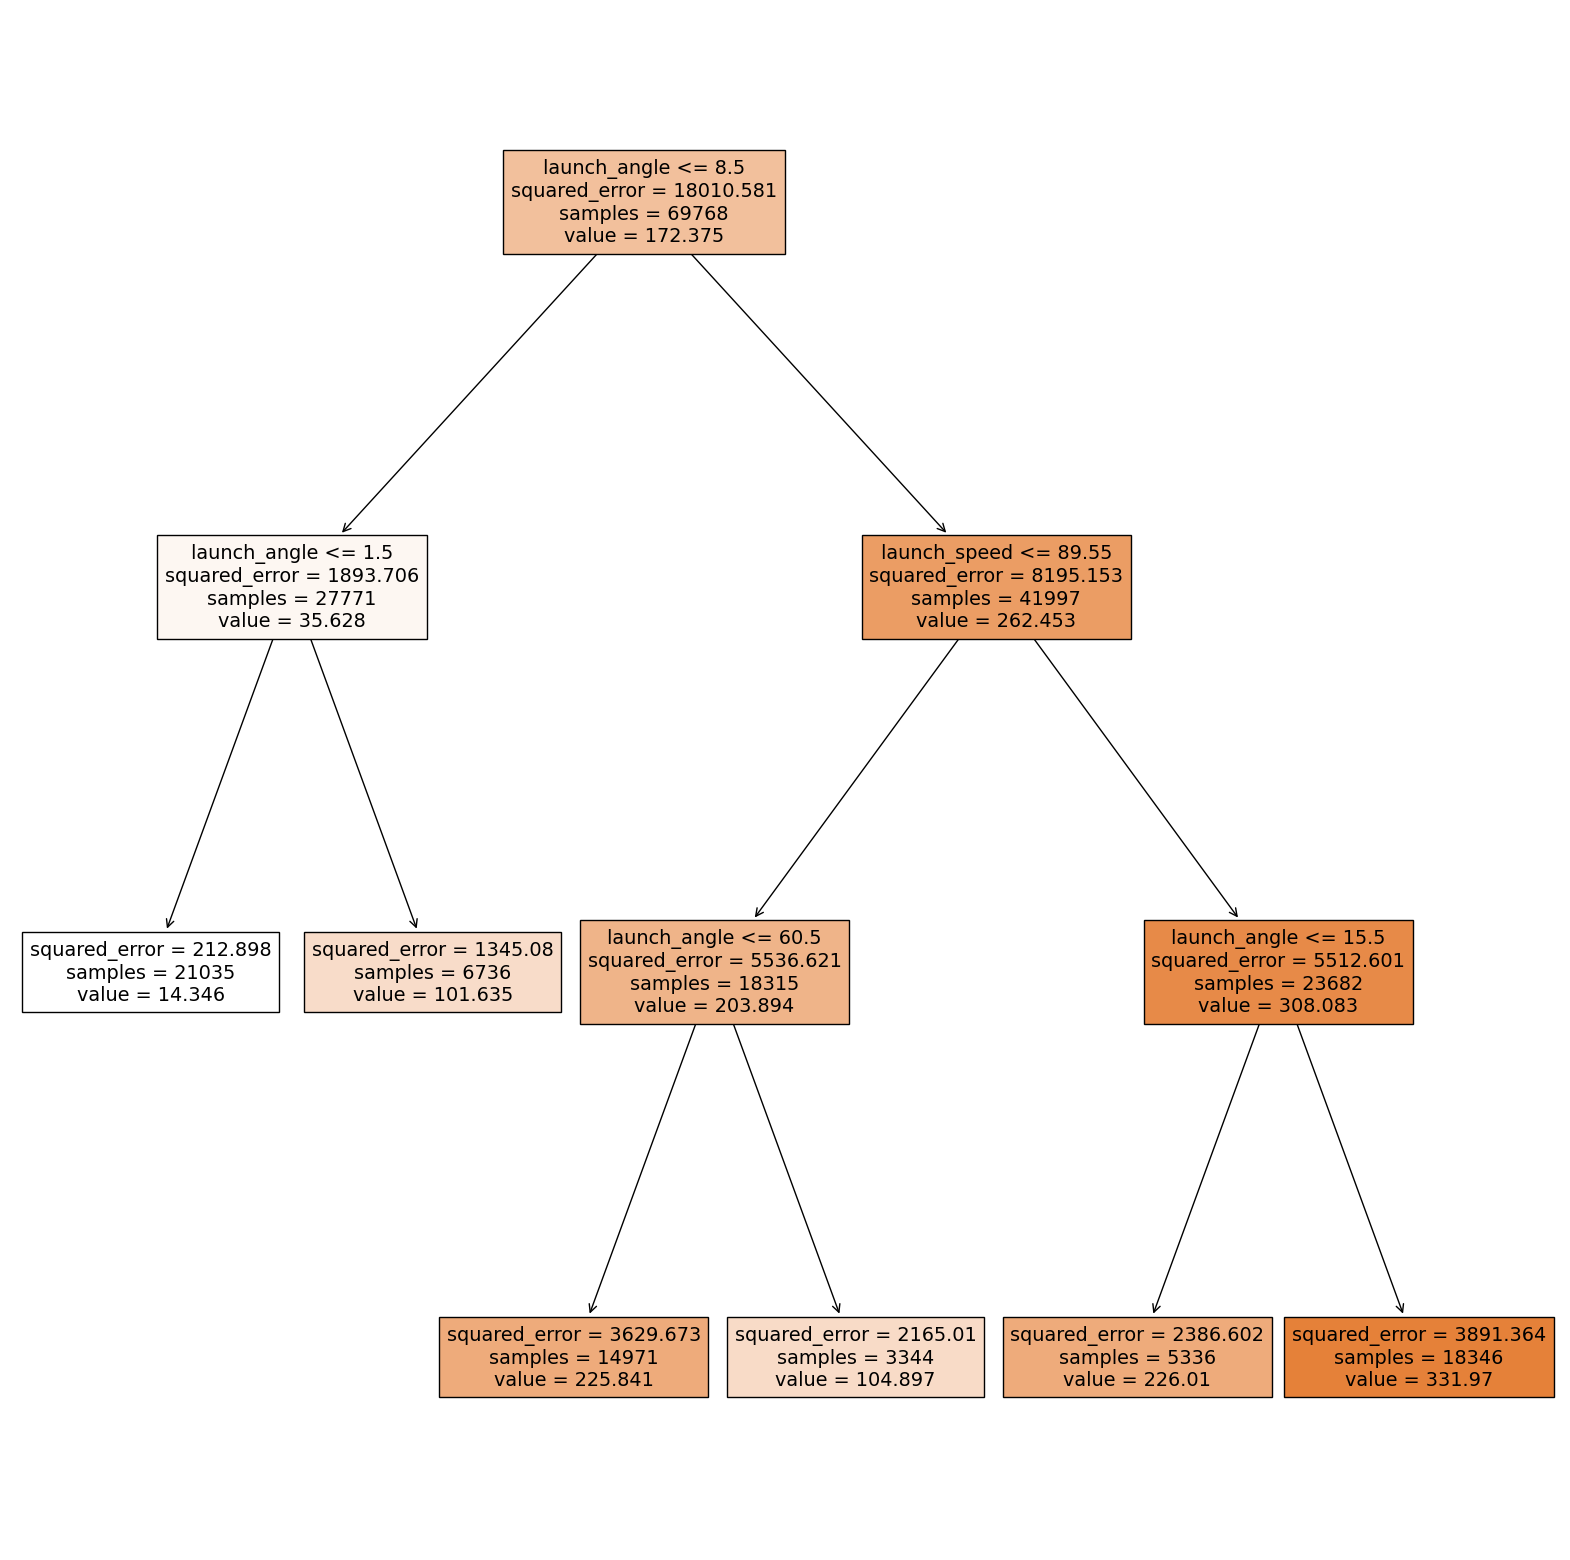

In [9]:
fig, ax = plt.subplots(figsize=(20,20))

tree.plot_tree(RandomForestRegressor.estimators_[0], filled=True,feature_names=feature_cols)

In [12]:
DecisionTreeRegressor = DecisionTreeRegressor()

In [13]:
#DecisionTreeRegressor = DecisionTreeRegressor(n_estimators = 4, max_depth = 5, max_leaf_nodes=6 )

DecisionTreeRegressor.fit(X_train, y_train.values.ravel())

DecisionTreeRegressor()

In [14]:
viz_model = dtreeviz.model(DecisionTreeRegressor,
                           X_train=X_train, y_train=y_train.values.ravel(),
                           feature_names=feature_cols,
                           target_name='hit_distance_sc')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names


KeyboardInterrupt: 

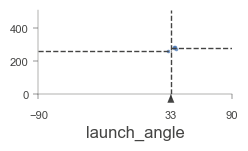

: 

In [15]:
viz_model.view()


In [68]:
viz_model = dtreeviz.model(lgbm_model, tree_index=1,
                           X_train=dataset[features], y_train=dataset[target],
                           feature_names=features,
                           target_name=target, class_names=["perish", "survive"])

ValueError: model argument must implement method `predict_proba()`

**Viz Attempt**

In [ ]:
xgb = XGBRegressor(XGB__learning_rate=0.1, max_depth=5, min_child_weight = 1, subsample = 1.0, n_estimators=10)

In [ ]:
viz_rmodel = dtreeviz.model(model=xgb, tree_index=1, 
                           X_train=X_train, y_train=y_train.values.ravel(),
                           feature_names=feature_cols,
                           target_name=target_cols)

viz_rmodel.view(fancy=False)